In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/imdb-video-games-dataset/imdb_video_games.csv', thousands=',', index_col=['Popularity'])
df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Director,Stars,Certificate
Popularity,,,,,,,,,,
0,Baldur's Gate III,"Action, Adventure, Fantasy",9.8,1130.0,NaN,2023.0,Return to the Faerun in a tale of fellowship a...,"Swen Vincke,","Amelia Tyler, Neil Newbon, Jennifer English, D...",M
1,Starfield,"Action, Adventure, Drama",8.7,524.0,NaN,2023.0,"Set 300 years in the future, the player will a...","Todd Howard,","Sumalee Montano, Damien C. Haas, Barry Wiggins...",M
2,Red Dead Redemption II,"Action, Adventure, Crime",9.7,47844.0,NaN,2018.0,Amidst the decline of the Wild West at the tur...,NaN,"Benjamin Byron Davis, Roger Clark, Rob Wiethof...",M
3,Armored Core VI: Fires of Rubicon,"Action, Adventure, Sci-Fi",7.9,114.0,NaN,2023.0,Fifty years after a cataclysm caused by a subs...,"Masaru Yamamura, Kenneth Kin Yue Chan, Hidetak...","Fairouz Ai, Takayuki Sakazume, Megumi Han, Aya...",T
4,The Quarry,"Action, Adventure, Drama",8.0,4625.0,NaN,2022.0,When the sun goes down on the last night of su...,"Will Byles,","Siobhan Williams, Skyler Gisondo, Ted Raimi, G...",M


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14682 entries, 0 to 14681
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            14682 non-null  object 
 1   Genre            14682 non-null  object 
 2   User Rating      8654 non-null   float64
 3   Number of Votes  8654 non-null   float64
 4   Runtime          101 non-null    object 
 5   Year             14463 non-null  float64
 6   Summary          8480 non-null   object 
 7   Director         3967 non-null   object 
 8   Stars            8617 non-null   object 
 9   Certificate      6704 non-null   object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


<Axes: xlabel='Year', ylabel='Count'>

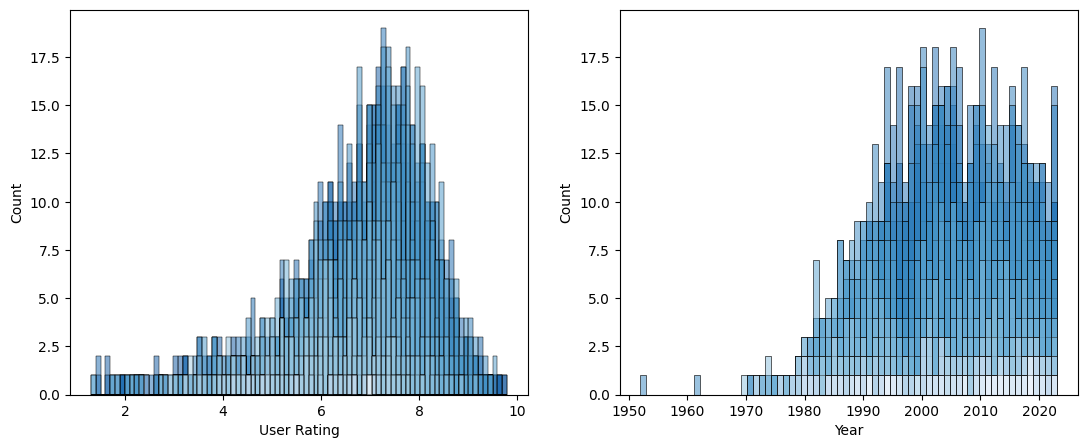

In [3]:
from matplotlib.pyplot import subplots
from seaborn import histplot
_, ax = subplots(figsize=(13, 5), ncols=2)
histplot(ax=ax[0], data=df, x='User Rating', bins=int(1 + 10 * (df['User Rating'].max() - df['User Rating'].min())), hue='Year', legend=False,
        palette='Blues')
histplot(ax=ax[1], data=df, hue='User Rating', bins=70, x='Year', legend=False, palette='Blues')

In [4]:
from plotly.express import scatter
scatter(data_frame=df, x='Number of Votes', y='User Rating', log_x=True, color='Certificate', hover_name='Title')

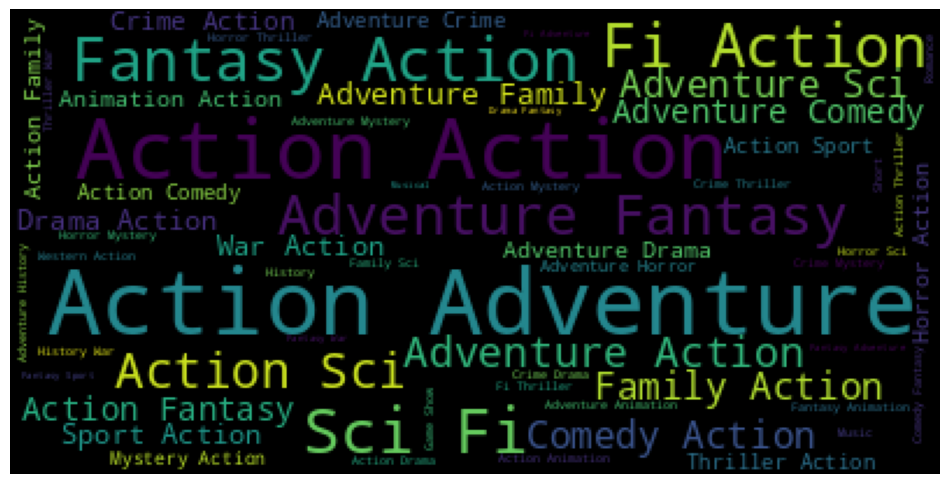

In [5]:
from wordcloud import WordCloud
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from matplotlib.pyplot import subplots
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud().generate(' '.join(df['Genre'].values.tolist())))

Action is very popular.

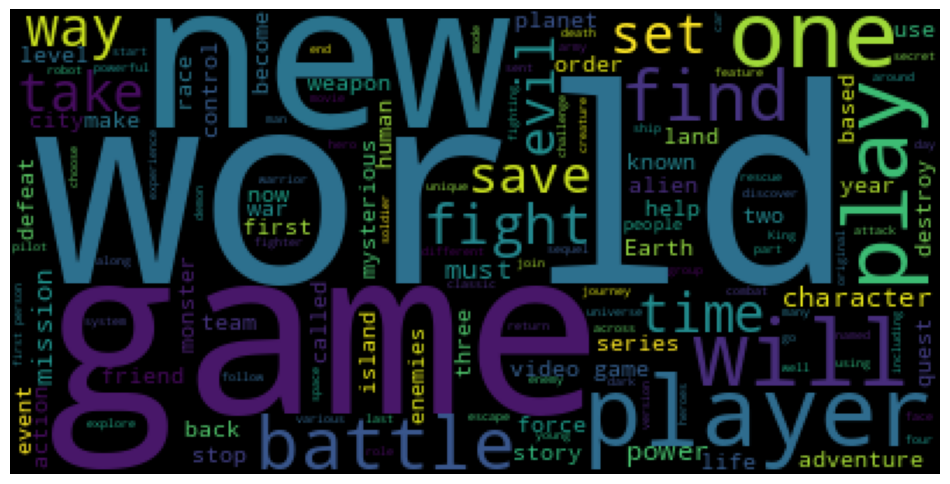

In [6]:
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud().generate(' '.join(df.dropna(subset='Summary')['Summary'].values.tolist())))

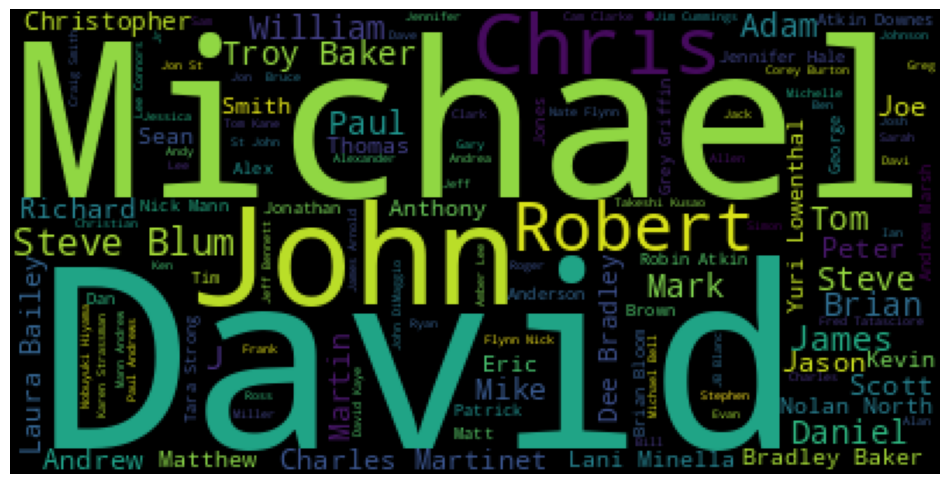

In [7]:
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud().generate(' '.join(df.dropna(subset='Stars')['Stars'].values.tolist())))

Mostly stars with male names; what a surprise.